In [2]:

import pandas as pd
import matplotlib.pyplot as plt 


import seaborn as sns

# Loading the titanic data set from sns
ds = sns.load_dataset("titanic")

# Display first 10 rows
ds.head(10)
ds.info()
ds.isnull().sum()
ds.loc[:, 'age'] = ds['age'].fillna(ds['age'].median())
ds.drop(columns=['deck'], inplace=True)
print(ds.isnull().sum())

ds['age'].describe()
ds.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
survived       0
pclass         0
sex            0
age            0
sibsp      

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


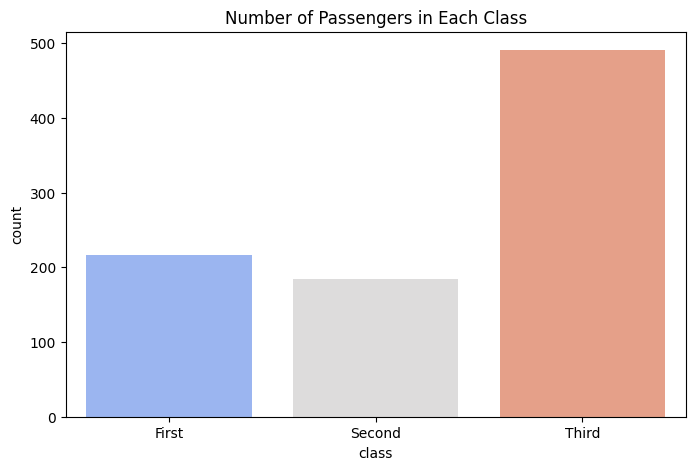

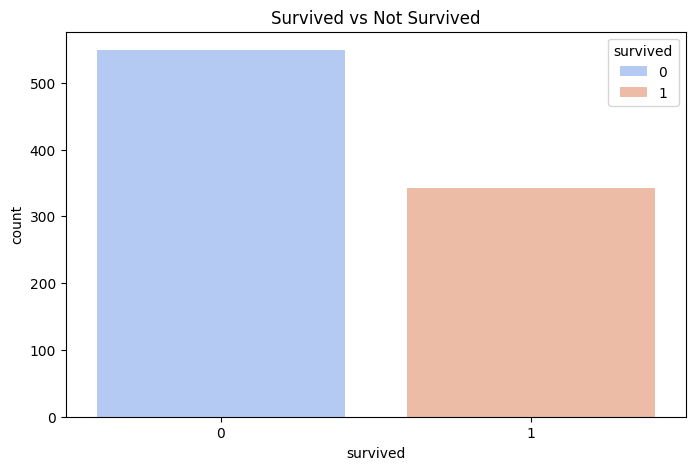

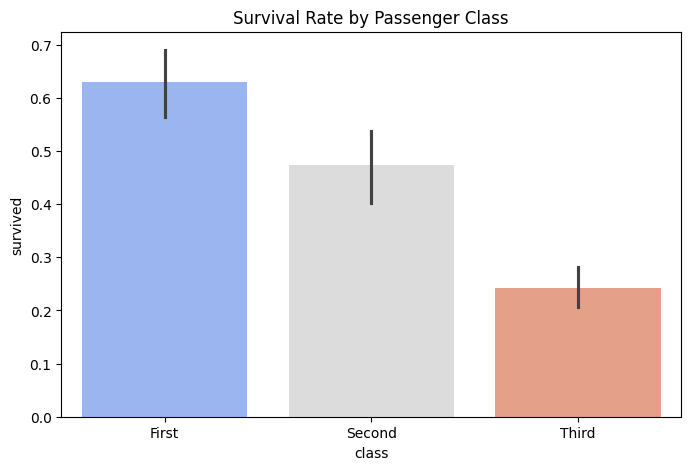

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots are displayed in Jupyter Notebook
%matplotlib inline  

# Plot 1: Number of passengers in each class
plt.figure(figsize=(8, 5))
sns.countplot(data=ds, x="class", hue="class", palette='coolwarm')  
plt.title("Number of Passengers in Each Class")  
plt.show()

# Plot: Survived vs Not Survived
plt.figure(figsize=(8, 5))
sns.countplot(data=ds, x="survived", hue="survived", palette='coolwarm') 
plt.title("Survived vs Not Survived")
plt.show()

# Plot to compare survival rate across classes
plt.figure(figsize=(8, 5))
sns.barplot(x="class", y="survived", hue="class", data=ds, palette="coolwarm")  # Ensure proper hue
plt.title("Survival Rate by Passenger Class")
plt.show()


C:\Users\delli\AppData\Local\Temp\ipykernel_10924\555044980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="sex", y="survived", data=ds, palette="coolwarm")


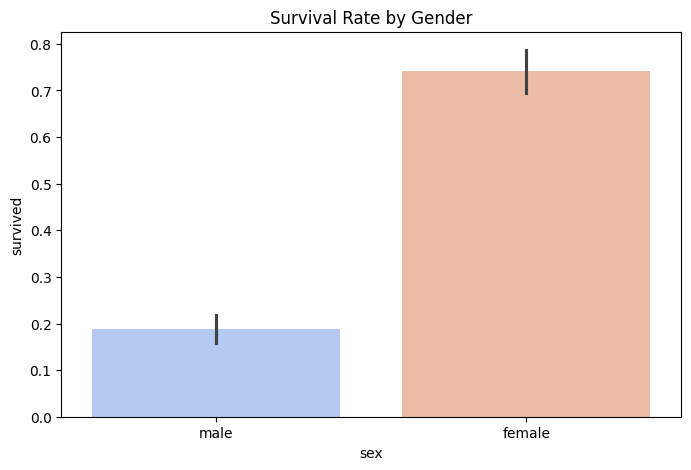

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5)) #how does passengerclass and gender class affects survival
sns.barplot(x="sex", y="survived", data=ds, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()
#so we can say that we are actually calculating that which class has a more survival rate males or females?malew ratio is more

C:\Users\delli\AppData\Local\Temp\ipykernel_10924\3118162705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="pclass", y="survived", data=ds, palette="coolwarm")


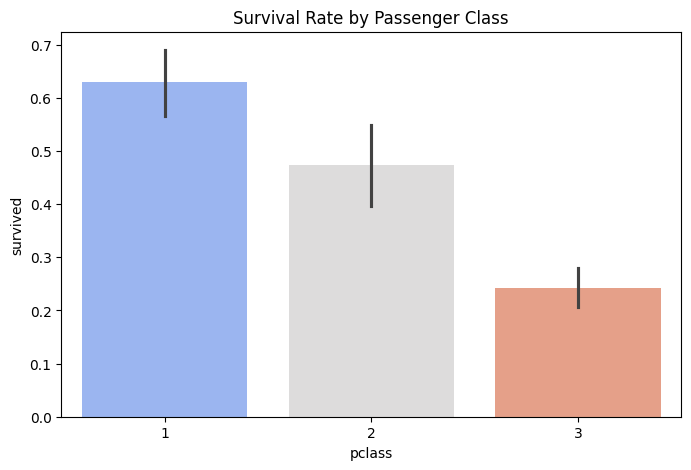

In [6]:
plt.figure(figsize=(8,5))
sns.barplot(x="pclass", y="survived", data=ds, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.show()
#does first class passengers survive more?yes

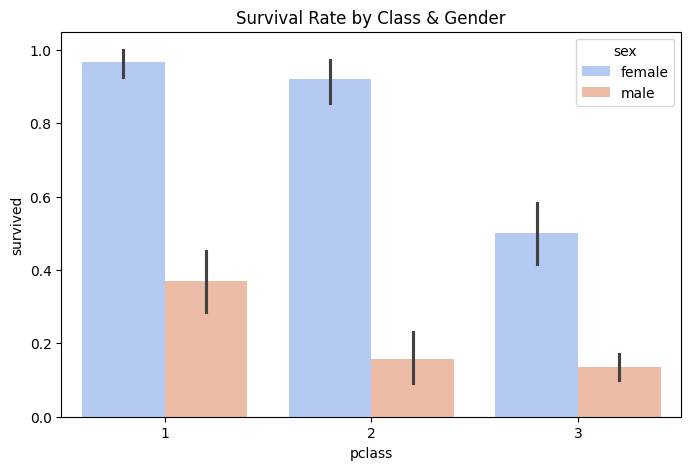

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x="pclass", y="survived", hue="sex", data=ds, palette="coolwarm")
plt.title("Survival Rate by Class & Gender")
plt.show()
#does female passengers from first class survive more?yes

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'FamilySize'],
      dtype='object')


C:\Users\delli\AppData\Local\Temp\ipykernel_10924\1585615476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="survived", data=ds, palette="coolwarm")


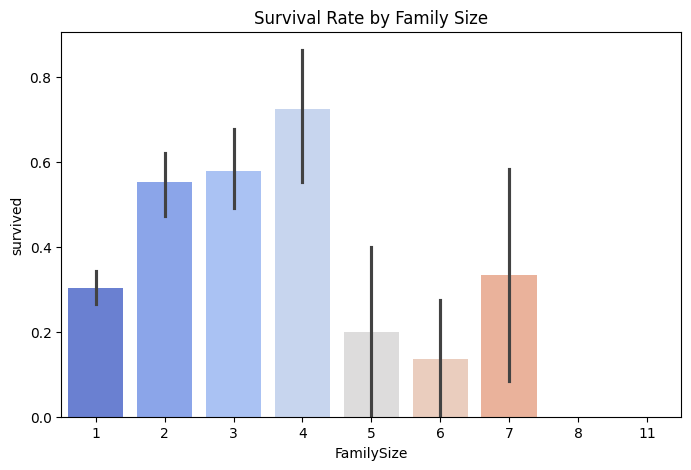

In [15]:
print(ds.columns)
ds["FamilySize"] = ds["sibsp"] + ds["parch"] + 1  # Lowercase "sibsp"
plt.figure(figsize=(8,5))
sns.barplot(x="FamilySize", y="survived", data=ds, palette="coolwarm")
plt.title("Survival Rate by Family Size")
plt.show()
#did large families and solo travelers survived


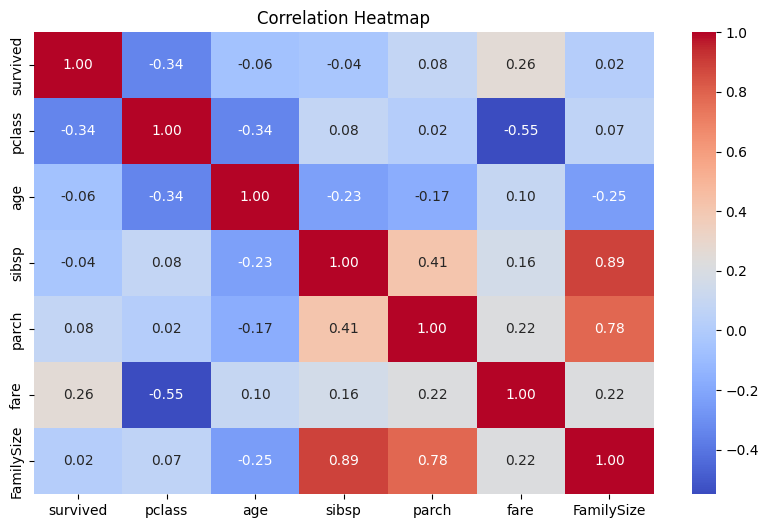

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(ds.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


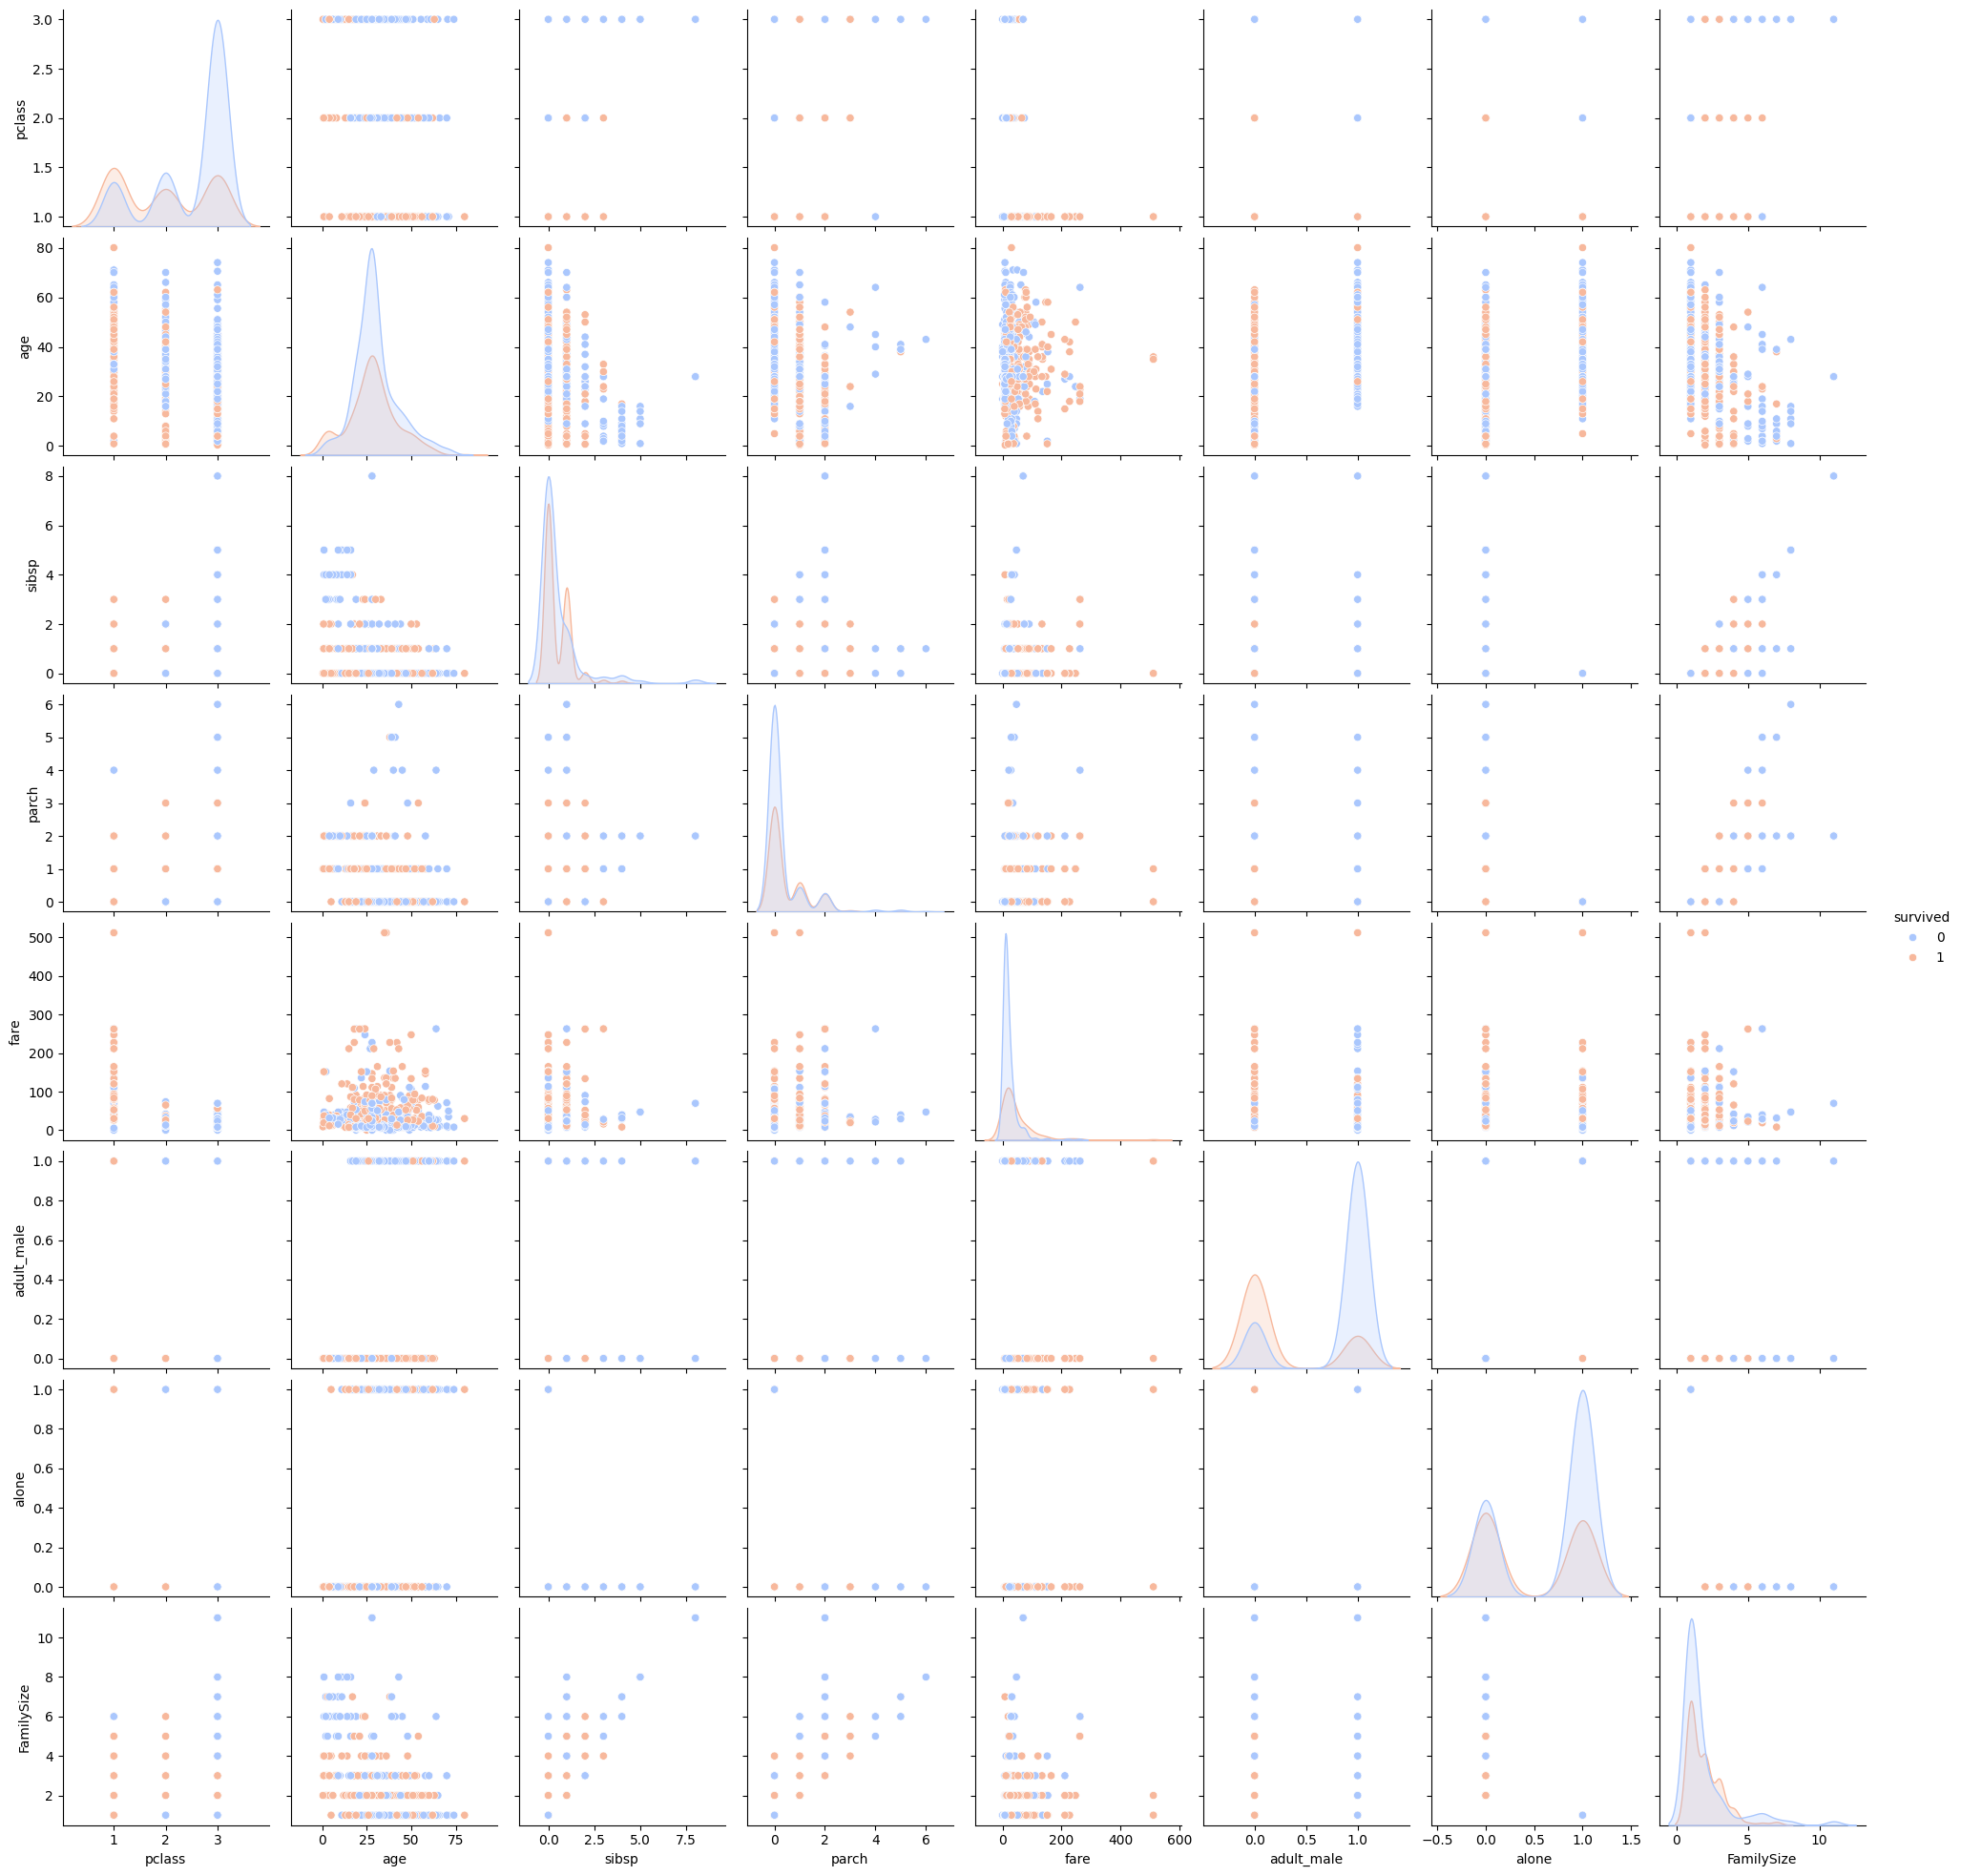

In [19]:
sns.pairplot(ds, hue="survived", palette="coolwarm")
plt.show()


C:\Users\delli\AppData\Local\Temp\ipykernel_10924\2070882278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y="fare", data=ds, palette="coolwarm")


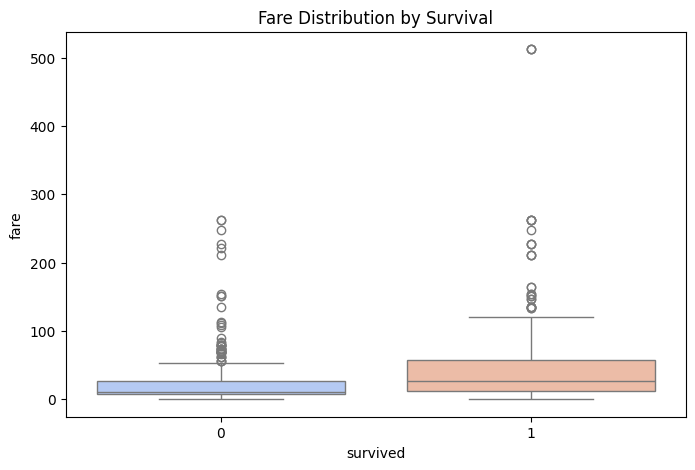

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x="survived", y="fare", data=ds, palette="coolwarm")
plt.title("Fare Distribution by Survival")
plt.show()


C:\Users\delli\AppData\Local\Temp\ipykernel_10924\2732409789.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="survived", y="age", data=ds, palette="coolwarm")


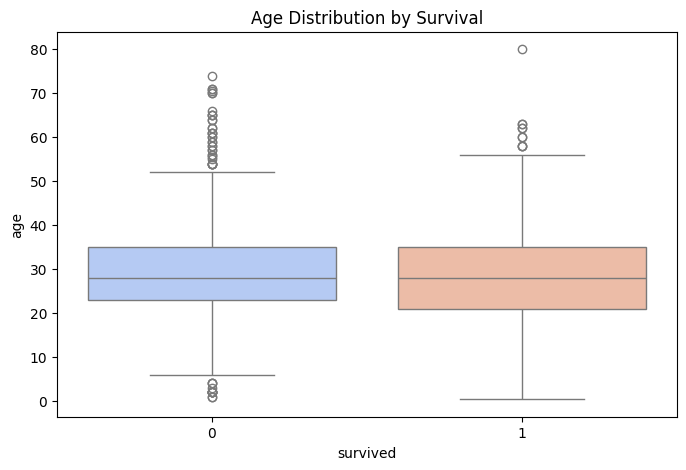

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="survived", y="age", data=ds, palette="coolwarm")
plt.title("Age Distribution by Survival")
plt.show()


# **Titanic Dataset - Exploratory Data Analysis (EDA)**  

## **1. Introduction**  
This report explores the **Titanic dataset** to uncover key patterns and insights related to passenger survival. Through data analysis and visualizations, we aim to understand the factors that influenced survival rates, such as **class, gender, fare, and family size**.

## **2. Key Insights**  

###  **Passenger Distribution**  
- The majority of passengers were in **third class**, while first-class had the fewest travelers.  
- **Women and children** had a significantly higher survival rate than men.  

###  **Fare & Survival Relationship**  
- Passengers who paid **higher fares** had a better chance of survival.  
- First-class passengers had **better access to lifeboats**, which contributed to their higher survival rates.

###  **Family Size Impact**  
- Individuals traveling **alone** had lower survival chances.  
- Passengers with **small families** (1-3 members) had a **better survival rate** compared to those with **large families** (more than 4 members).  

## **3. Correlation Analysis**  
A heatmap was generated to examine feature correlations:  

###  **Correlation Findings:**  
- **Survival is positively correlated with fare and class** (higher class = better survival).  
- **Siblings/Spouse (sibsp) and Parent/Children (parch) features are related**, as expected.  
- **Gender plays a crucial role in survival**, with women having much higher chances.  

Below is the heatmap representation of these correlations:  

`![heatmap](heatmap.png)`

## **4. Conclusion**  
The analysis confirms that **class, gender, and fare price** were the most influential factors in determining survival. Women, children, and first-class passengers had significantly higher survival rates. Meanwhile, those traveling alone or in lower classes faced a much higher risk of not surviving.  

---

### **Next Steps**  
- Perform **further feature engineering** to enhance predictive modeling.  
- Use **machine learning algorithms** to predict survival probabilities.  

This EDA provides a strong foundation for deeper analysis and model-building! 🚀
